In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
Retail_orders= pd.read_csv("Retail Orders.csv")
Retail_orders.shape

(9994, 16)

In [ ]:
Retail_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [ ]:
Retail_orders.sample(10)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
4329,4330,2022-05-04,Standard Class,Consumer,United States,Hialeah,Florida,33012,South,Office Supplies,Paper,OFF-PA-10000556,20,20,3,4
6971,6972,2023-10-11,Standard Class,Consumer,United States,Phoenix,Arizona,85023,West,Technology,Accessories,TEC-AC-10000109,80,90,2,3
749,750,2022-11-17,Standard Class,Consumer,United States,Trenton,Michigan,48183,Central,Office Supplies,Binders,OFF-BI-10003638,50,60,3,3
8551,8552,2023-12-01,Standard Class,Corporate,United States,Houston,Texas,77041,Central,Office Supplies,Fasteners,OFF-FA-10004248,10,10,4,5
6419,6420,2023-03-04,Standard Class,Corporate,United States,Tulsa,Oklahoma,74133,Central,Furniture,Chairs,FUR-CH-10002084,320,370,3,5
4124,4125,2022-01-06,Standard Class,Corporate,United States,Watertown,New York,13601,East,Office Supplies,Appliances,OFF-AP-10004249,40,40,3,2
8191,8192,2022-06-02,Standard Class,Consumer,United States,New York City,New York,10011,East,Furniture,Furnishings,FUR-FU-10004091,170,190,4,5
8576,8577,2023-11-04,First Class,Consumer,United States,Concord,New Hampshire,3301,East,Furniture,Furnishings,FUR-FU-10004188,90,100,1,4
4015,4016,2023-02-27,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Paper,OFF-PA-10002319,160,190,5,2
3414,3415,2022-04-28,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Binders,OFF-BI-10000977,50,50,2,2


In [ ]:
#Checking if there are Null Values
Retail_orders.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           1
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

In [ ]:
Retail_orders['Ship Mode']

0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9989      Second Class
9990    Standard Class
9991    Standard Class
9992    Standard Class
9993      Second Class
Name: Ship Mode, Length: 9994, dtype: object

In [ ]:
Retail_orders['Ship Mode'].value_counts()

Ship Mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
Not Available        4
unknown              1
Name: count, dtype: int64

In [ ]:
# Removing Not Avaiable, unknown & nan rows
Retail_orders[Retail_orders['Ship Mode'] == 'unknown']
Retail_orders[Retail_orders['Ship Mode'] == 'Not Available']
Retail_orders.dropna(inplace=True)
Retail_orders = Retail_orders.loc[(~Retail_orders['Ship Mode'].isin(['Not Available', 'unknown'])) & (~Retail_orders['Ship Mode'].isna())]
Retail_orders['Ship Mode'].value_counts()

Ship Mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [ ]:
Retail_orders.shape

(9988, 16)

In [ ]:
#checking Duplication
Retail_orders.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9988, dtype: bool

In [ ]:
Retail_orders[Retail_orders.duplicated()]

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent


In [ ]:
Retail_orders = Retail_orders.drop(['Postal Code','Product Id','Country'], axis=1)

In [ ]:
#checking dtype of order date
Retail_orders['Order Date']

0       2023-03-01
1       2023-08-15
2       2023-01-10
3       2022-06-18
4       2022-07-13
           ...    
9989    2023-02-18
9990    2023-03-17
9991    2022-08-07
9992    2022-11-19
9993    2022-07-17
Name: Order Date, Length: 9988, dtype: object

In [ ]:
#changing dtype from object to datetime dtype
Retail_orders['Order Date'] = pd.to_datetime(Retail_orders['Order Date'])
Retail_orders['Order Date']

0      2023-03-01
1      2023-08-15
2      2023-01-10
3      2022-06-18
4      2022-07-13
          ...    
9989   2023-02-18
9990   2023-03-17
9991   2022-08-07
9992   2022-11-19
9993   2022-07-17
Name: Order Date, Length: 9988, dtype: datetime64[ns]

In [ ]:
Retail_orders.head()


,Order Id,Order Date,Ship Mode,Segment,City,State,Region,Category,Sub Category,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,20,20,2,5


In [ ]:
#creation new columns for calculating Total Cost, total sales, Revenues & net Profit
Retail_orders['Total_cost']= Retail_orders['cost price'] * Retail_orders['Quantity']
Retail_orders['Total_cost']
print (Retail_orders['Discount Percent'].dtype)
Retail_orders['Discount Percent'] = Retail_orders['Discount Percent'].astype(float)
Retail_orders['Total Sales']= Retail_orders['List Price'] * Retail_orders['Quantity']
Retail_orders['Total Revenues'] = Retail_orders['Total Sales'] - (Retail_orders['Total Sales'] * (Retail_orders['Discount Percent'] / 100))
Retail_orders['Net Profit'] = Retail_orders['Total Revenues'] - Retail_orders['Total_cost']

int64


In [ ]:
Retail_orders.head()

,Order Id,Order Date,Ship Mode,Segment,City,State,Region,Category,Sub Category,cost price,List Price,Quantity,Discount Percent,Total_cost,Total Sales,Total Revenues,Net Profit
0,1,2023-03-01,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,240,260,2,2.0,480,520,509.6,29.6
1,2,2023-08-15,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,600,730,3,3.0,1800,2190,2124.3,324.3
2,3,2023-01-10,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,10,10,2,5.0,20,20,19.0,-1.0
3,4,2022-06-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,780,960,5,2.0,3900,4800,4704.0,804.0
4,5,2022-07-13,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,20,20,2,5.0,40,40,38.0,-2.0


In [ ]:
Retail_orders.describe()

,Order Id,Order Date,cost price,List Price,Quantity,Discount Percent,Total_cost,Total Sales,Total Revenues,Net Profit
count,9988.000000,9988,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,5000.484882,2022-12-29 08:30:56.948337920,201.061274,229.602523,3.788947,3.484081,1003.436123,1147.899479,1107.327423,103.891300
min,1.000000,2022-01-01 00:00:00,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-40.000000
25%,2503.750000,2022-06-29 00:00:00,20.000000,20.000000,2.000000,2.000000,50.000000,50.000000,48.500000,-1.200000
50%,5000.500000,2022-12-27 12:00:00,50.000000,50.000000,3.000000,3.000000,160.000000,180.000000,174.600000,14.000000
75%,7497.250000,2023-07-03 00:00:00,180.000000,210.000000,5.000000,4.000000,660.000000,760.000000,731.500000,64.500000
max,9994.000000,2023-12-31 00:00:00,18110.000000,22640.000000,14.000000,5.000000,109330.000000,135840.000000,130406.400000,21746.400000
std,2883.457544,NaN,537.719406,623.211282,2.224712,1.114209,3345.529331,3897.336248,3751.964465,455.122224


## Analysis of Categories and Sub-Categories

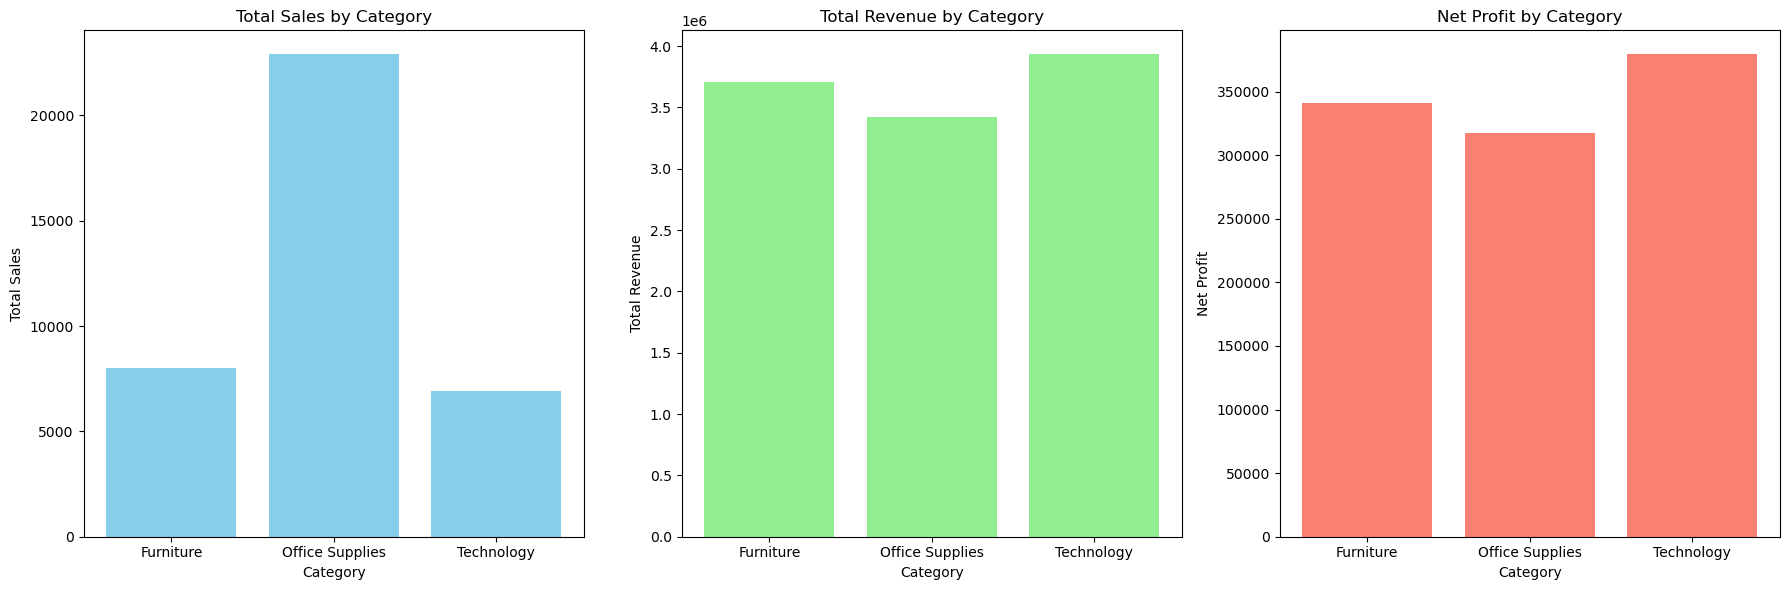

In [ ]:
#Which product categories contribute the most to total sales /Total Revenues / Net Profit?

# Group by 'Category' and calculate total sales, revenue, and profit
category_summary = Retail_orders.groupby('Category').agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Total Revenues', 'sum'),
    Net_Profit=('Net Profit', 'sum')
).reset_index()

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total Sales by Category
axes[0].bar(category_summary['Category'], category_summary['Total_Sales'], color='skyblue')
axes[0].set_title('Total Sales by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sales')

# Total Revenue by Category
axes[1].bar(category_summary['Category'], category_summary['Total_Revenue'], color='lightgreen')
axes[1].set_title('Total Revenue by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Revenue')

# Net Profit by Category
axes[2].bar(category_summary['Category'], category_summary['Net_Profit'], color='salmon')
axes[2].set_title('Net Profit by Category')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Net Profit')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


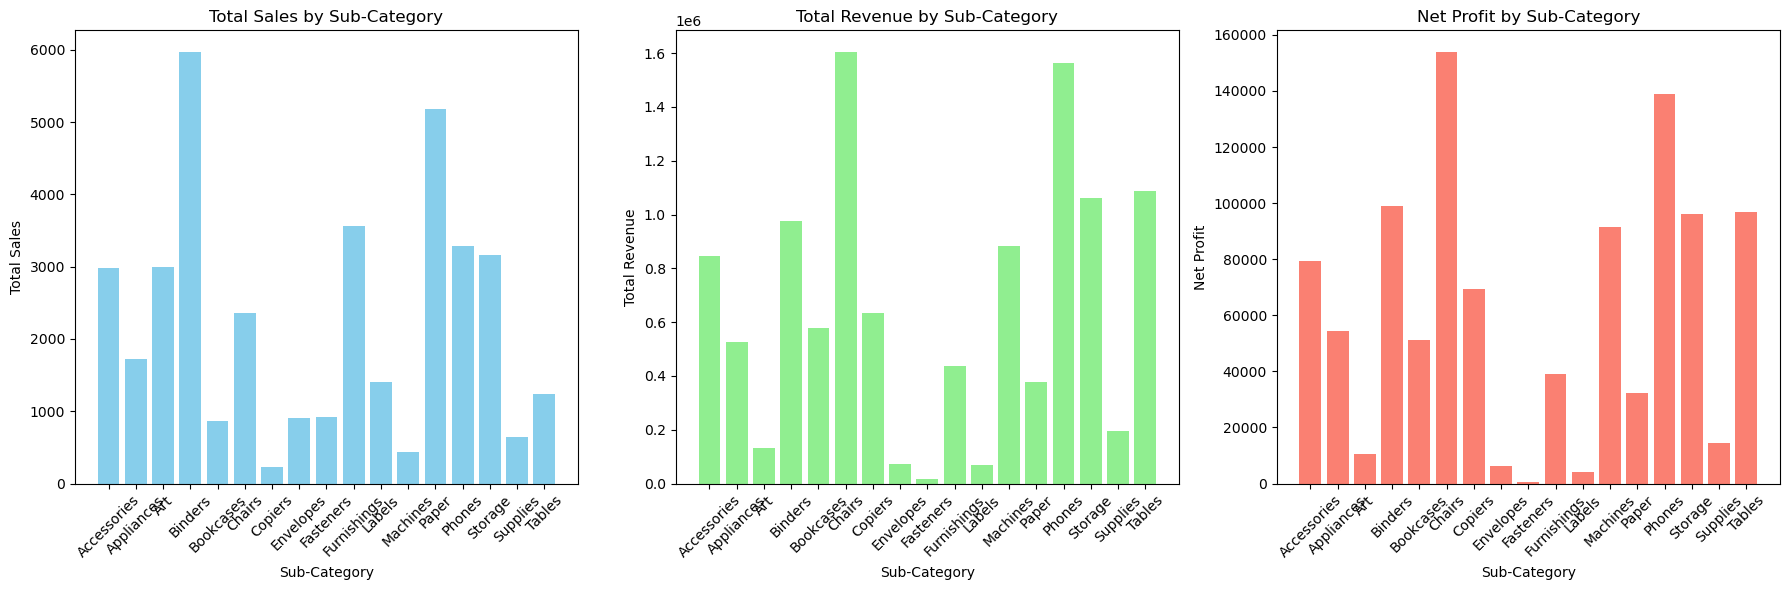

In [ ]:
#Which product sub-categories contribute the most to total sales /Total Revenues / Net Profit?

# Group by 'Sub Category' and calculate total sales, revenue, and profit
subcategory_summary = Retail_orders.groupby('Sub Category').agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Total Revenues', 'sum'),
    Net_Profit=('Net Profit', 'sum')
).reset_index()

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total Sales by Sub-Category
axes[0].bar(subcategory_summary['Sub Category'], subcategory_summary['Total_Sales'], color='skyblue')
axes[0].set_title('Total Sales by Sub-Category')
axes[0].set_xlabel('Sub-Category')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

# Total Revenue by Sub-Category
axes[1].bar(subcategory_summary['Sub Category'], subcategory_summary['Total_Revenue'], color='lightgreen')
axes[1].set_title('Total Revenue by Sub-Category')
axes[1].set_xlabel('Sub-Category')
axes[1].set_ylabel('Total Revenue')
axes[1].tick_params(axis='x', rotation=45)

# Net Profit by Sub-Category
axes[2].bar(subcategory_summary['Sub Category'], subcategory_summary['Net_Profit'], color='salmon')
axes[2].set_title('Net Profit by Sub-Category')
axes[2].set_xlabel('Sub-Category')
axes[2].set_ylabel('Net Profit')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Top 5 Sub-Categories by Total Sales:
    Sub Category  Total_Sales  Total_Revenue  Net_Profit
3       Binders         5970       976192.0     98792.0
12        Paper         5178       375602.6     32362.6
9   Furnishings         3556       437414.2     39094.2
13       Phones         3285      1565047.7    138967.7
14      Storage         3158      1061125.3     96105.3

Top 5 Sub-Categories by Total Revenues:
    Sub Category  Total_Sales  Total_Revenue  Net_Profit
5        Chairs         2356      1604415.7    153905.7
13       Phones         3285      1565047.7    138967.7
16       Tables         1232      1087243.9     96823.9
14      Storage         3158      1061125.3     96105.3
3       Binders         5970       976192.0     98792.0

Top 5 Sub-Categories by Net Profit:
    Sub Category  Total_Sales  Total_Revenue  Net_Profit
5        Chairs         2356      1604415.7    153905.7
13       Phones         3285      1565047.7    138967.7
3       Binders         5970       976192.

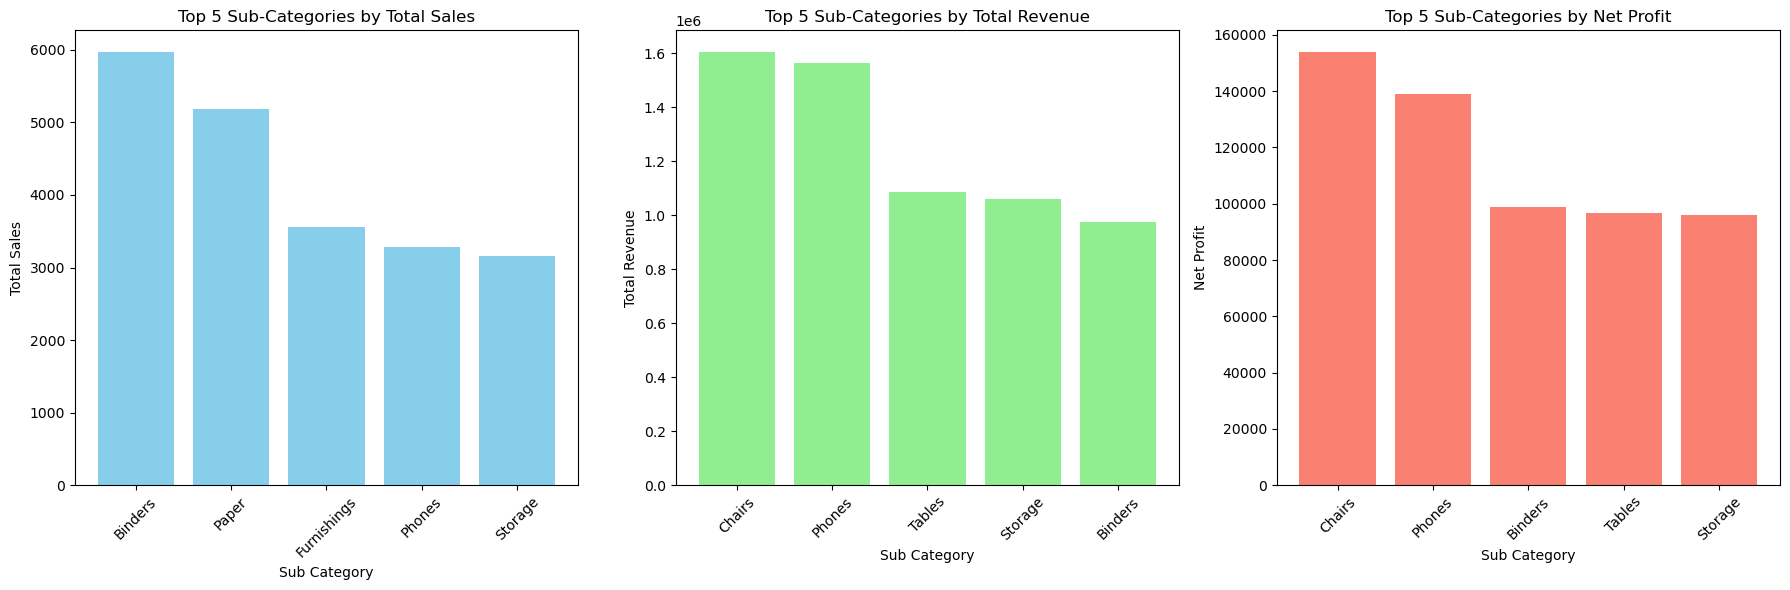

In [ ]:
#What are top 5 selling Sub Categories?  drive the most sales /Total Revenues / Net Profit.

# Get top 5 Sub-Categories by Total Sales, Total Revenue, and Net Profit
top_5_sales = subcategory_summary.sort_values(by='Total_Sales', ascending=False).head(5)
top_5_revenue = subcategory_summary.sort_values(by='Total_Revenue', ascending=False).head(5)
top_5_profit = subcategory_summary.sort_values(by='Net_Profit', ascending=False).head(5)

# Display the results
print("Top 5 Sub-Categories by Total Sales:\n", top_5_sales)
print("\nTop 5 Sub-Categories by Total Revenues:\n", top_5_revenue)
print("\nTop 5 Sub-Categories by Net Profit:\n", top_5_profit)

# Plot the Top 5 Sub-Categories by Sales, Revenue, and Profit
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Top 5 by Total Sales
axes[0].bar(top_5_sales['Sub Category'], top_5_sales['Total_Sales'], color='skyblue')
axes[0].set_title('Top 5 Sub-Categories by Total Sales')
axes[0].set_xlabel('Sub Category')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

# Plot Top 5 by Total Revenue
axes[1].bar(top_5_revenue['Sub Category'], top_5_revenue['Total_Revenue'], color='lightgreen')
axes[1].set_title('Top 5 Sub-Categories by Total Revenue')
axes[1].set_xlabel('Sub Category')
axes[1].set_ylabel('Total Revenue')
axes[1].tick_params(axis='x', rotation=45)

# Plot Top 5 by Net Profit
axes[2].bar(top_5_profit['Sub Category'], top_5_profit['Net_Profit'], color='salmon')
axes[2].set_title('Top 5 Sub-Categories by Net Profit')
axes[2].set_xlabel('Sub Category')
axes[2].set_ylabel('Net Profit')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


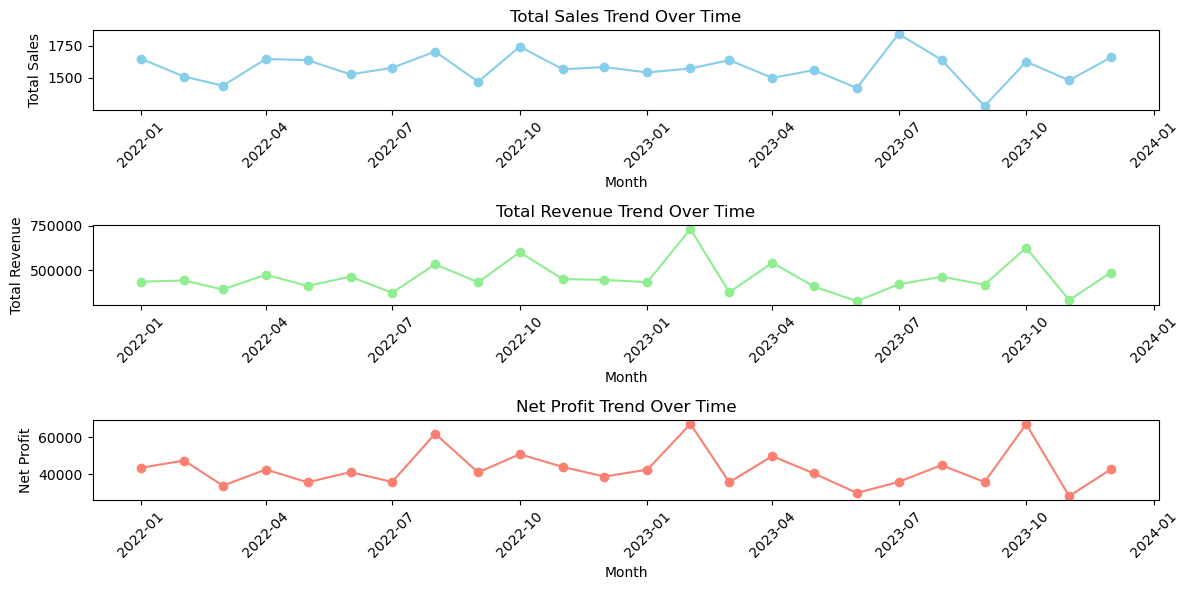

In [ ]:
#What are the overall sales/ Revenues / Net Profit trend over time?

# Extract month and year for grouping
Retail_orders['Month'] = Retail_orders['Order Date'].dt.to_period('M')

# Group by Month and calculate total sales, revenue, and profit
monthly_summary = Retail_orders.groupby('Month').agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Total Revenues', 'sum'),
    Net_Profit=('Net Profit', 'sum')
).reset_index()

# Convert 'Month' back to datetime for plotting
monthly_summary['Month'] = monthly_summary['Month'].dt.to_timestamp()

# Create plots for trends over time
plt.figure(figsize=(12, 6))

# Plot Total Sales trend
plt.subplot(3, 1, 1)
plt.plot(monthly_summary['Month'], monthly_summary['Total_Sales'], marker='o', color='skyblue')
plt.title('Total Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Plot Total Revenue trend
plt.subplot(3, 1, 2)
plt.plot(monthly_summary['Month'], monthly_summary['Total_Revenue'], marker='o', color='lightgreen')
plt.title('Total Revenue Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Plot Net Profit trend
plt.subplot(3, 1, 3)
plt.plot(monthly_summary['Month'], monthly_summary['Net_Profit'], marker='o', color='salmon')
plt.title('Net Profit Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## Analysis by Customer Segment

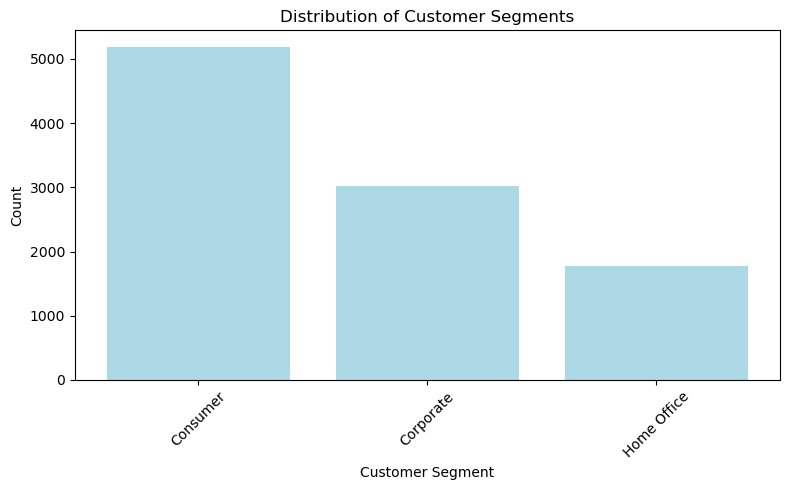

In [ ]:
#What is the distribution of customer segments?

# Count the occurrences of each customer segment
segment_distribution = Retail_orders['Segment'].value_counts().reset_index()
segment_distribution.columns = ['Customer Segment', 'Count']

# Create a bar chart to visualize the distribution
plt.figure(figsize=(8, 5))
plt.bar(segment_distribution['Customer Segment'], segment_distribution['Count'], color='lightblue')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


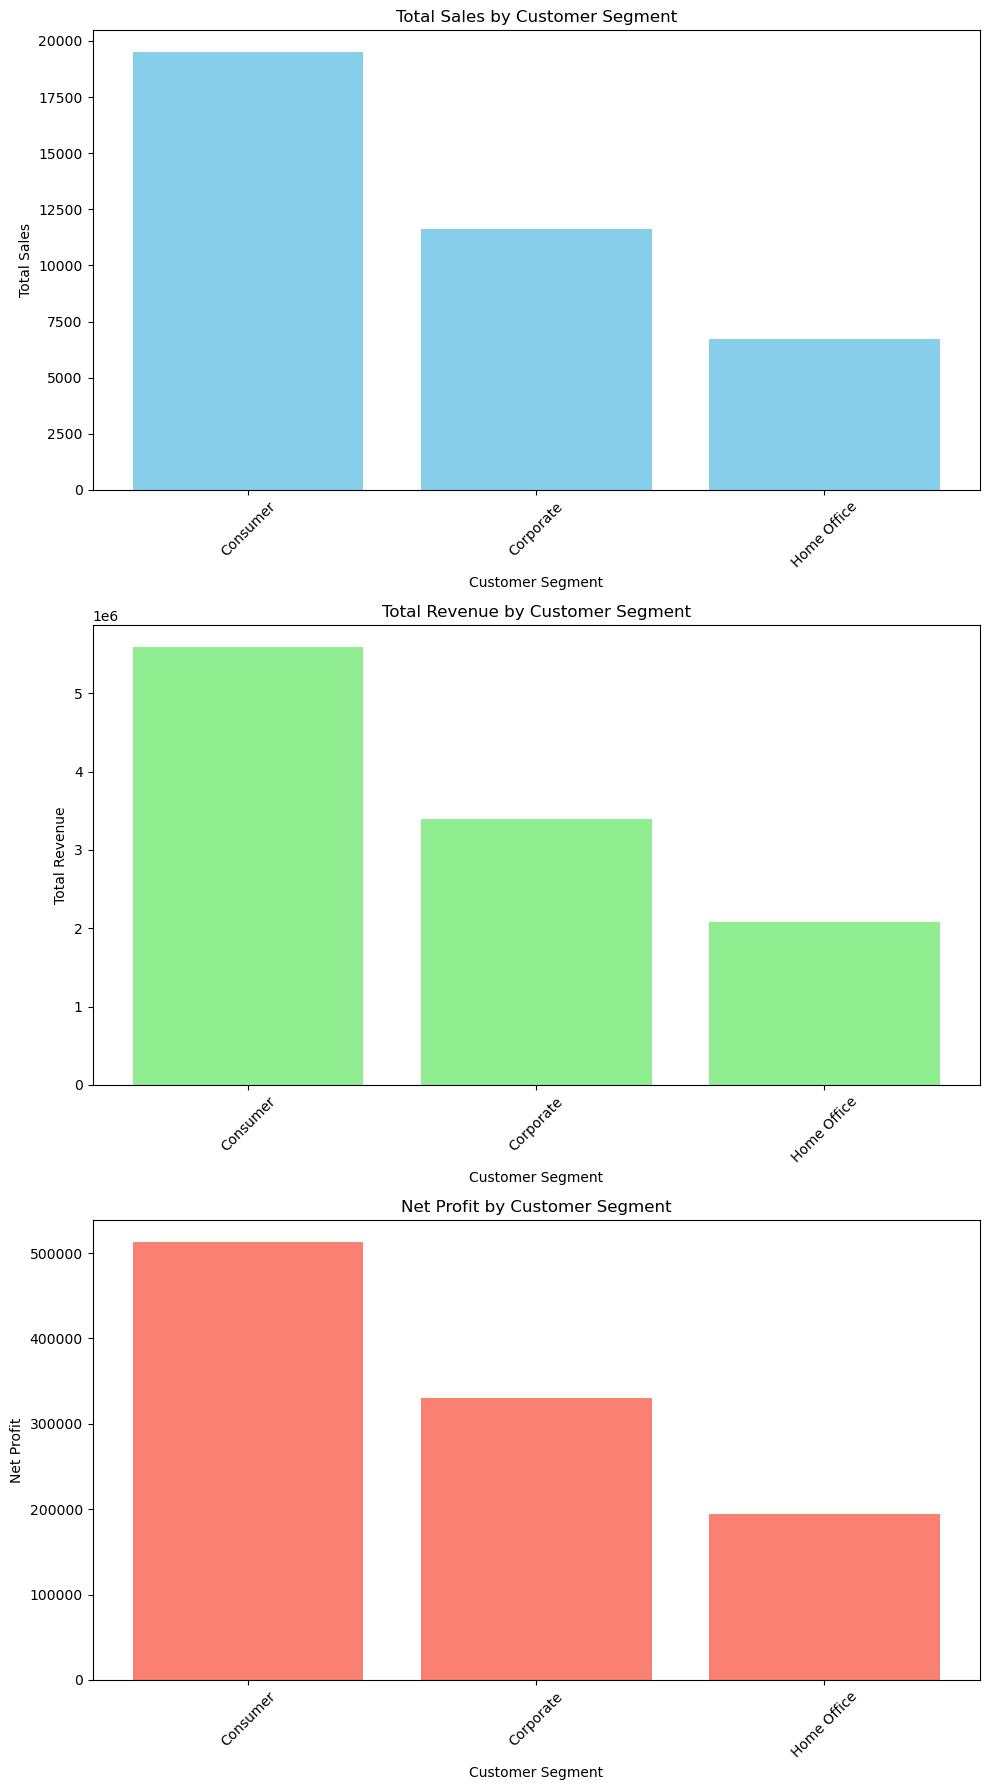

       Segment  Total_Sales  Total_Revenue  Net_Profit
0     Consumer        19498      5589002.7    512762.7
1    Corporate        11607      3394764.1    330584.1
2  Home Office         6739      2076219.5    194319.5


In [ ]:
#Which customer segment drive the most sales /Total Revenues / Net Profit?

# Group by 'Segment' and calculate total sales, revenue, and profit
segment_summary = Retail_orders.groupby('Segment').agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Total Revenues', 'sum'),
    Net_Profit=('Net Profit', 'sum')
).reset_index()

# Create subplots for each metric
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Total Sales by Segment
axes[0].bar(segment_summary['Segment'], segment_summary['Total_Sales'], color='skyblue')
axes[0].set_title('Total Sales by Customer Segment')
axes[0].set_xlabel('Customer Segment')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

# Total Revenue by Segment
axes[1].bar(segment_summary['Segment'], segment_summary['Total_Revenue'], color='lightgreen')
axes[1].set_title('Total Revenue by Customer Segment')
axes[1].set_xlabel('Customer Segment')
axes[1].set_ylabel('Total Revenue')
axes[1].tick_params(axis='x', rotation=45)

# Net Profit by Segment
axes[2].bar(segment_summary['Segment'], segment_summary['Net_Profit'], color='salmon')
axes[2].set_title('Net Profit by Customer Segment')
axes[2].set_xlabel('Customer Segment')
axes[2].set_ylabel('Net Profit')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Display the segment summary for reference
print(segment_summary)


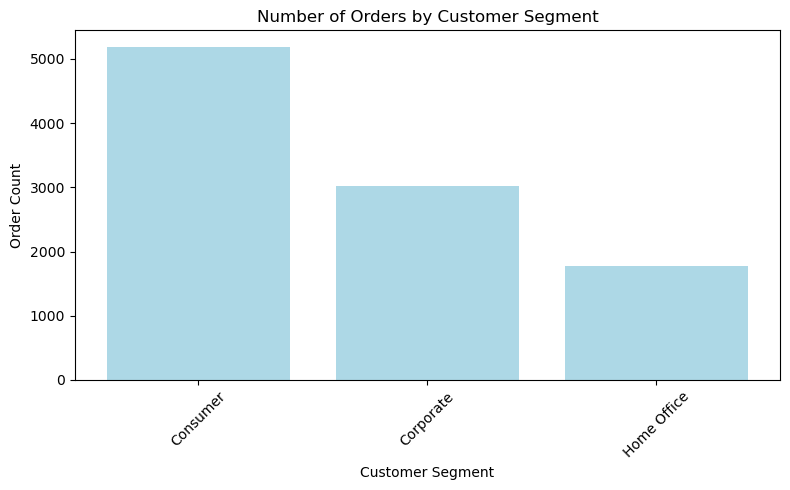

  Customer Segment  Order Count
0         Consumer         5187
1        Corporate         3019
2      Home Office         1782


In [ ]:
# What segment place the highest number of orders?

# Count the number of orders per customer segment
order_count_by_segment = Retail_orders['Segment'].value_counts().reset_index()
order_count_by_segment.columns = ['Customer Segment', 'Order Count']

# Create a bar chart to visualize the number of orders by segment
plt.figure(figsize=(8, 5))
plt.bar(order_count_by_segment['Customer Segment'], order_count_by_segment['Order Count'], color='lightblue')
plt.title('Number of Orders by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the order count summary for reference
print(order_count_by_segment)


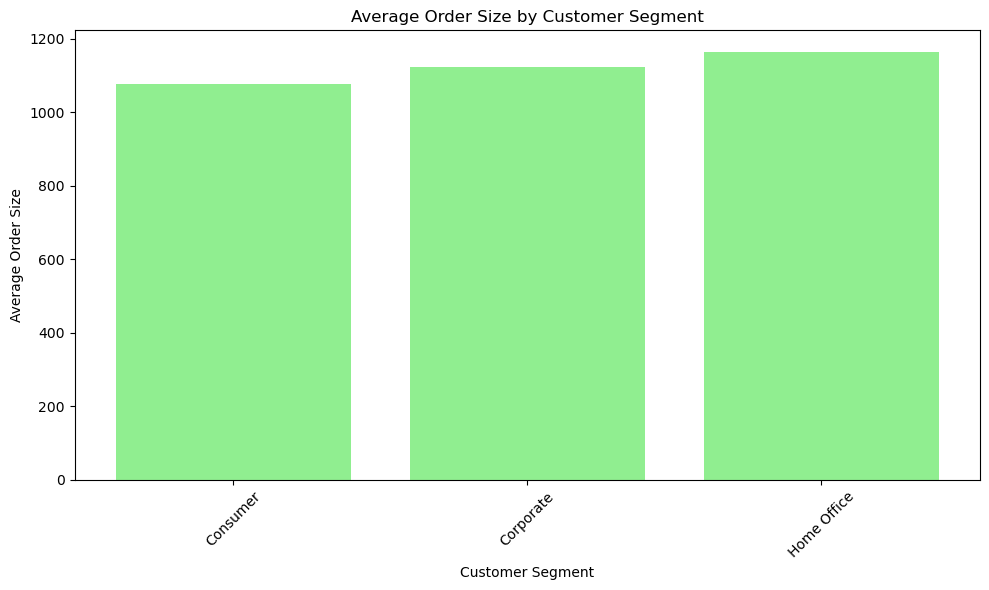

       Segment  Average_Order_Size
0     Consumer         1077.501966
1    Corporate         1124.466413
2  Home Office         1165.106341


In [ ]:
# Group by 'Segment' to calculate total sales and order count
segment_summary = Retail_orders.groupby('Segment').agg(
    Total_Sales=('Total Revenues', 'sum'),  # Total Sales based on Total Revenue
    Order_Count=('Quantity', 'count')  # Count of orders based on Quantity
).reset_index()

# Calculate average order size
segment_summary['Average_Order_Size'] = segment_summary['Total_Sales'] / segment_summary['Order_Count']

# Create a bar chart to visualize the average order size by segment
plt.figure(figsize=(10, 6))
plt.bar(segment_summary['Segment'], segment_summary['Average_Order_Size'], color='lightgreen')
plt.title('Average Order Size by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Order Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the segment summary for reference
print(segment_summary[['Segment', 'Average_Order_Size']])


## Analysis of regions, states, and cities

In [ ]:
# What are the total sales, total revenues, and net profit for different regions?
regions_totals = Retail_orders.groupby('Region').agg({'Total Sales': 'sum', 'Total Revenues': 'sum', 'Net Profit': 'sum'}).reset_index()
regions_totals

,Region,Total Sales,Total Revenues,Net Profit
0,Central,2474680,2387548.7,236088.7
1,East,3378470,3257983.8,295773.8
2,South,2037060,1965901.6,202731.6
3,West,3575010,3448552.2,303072.2


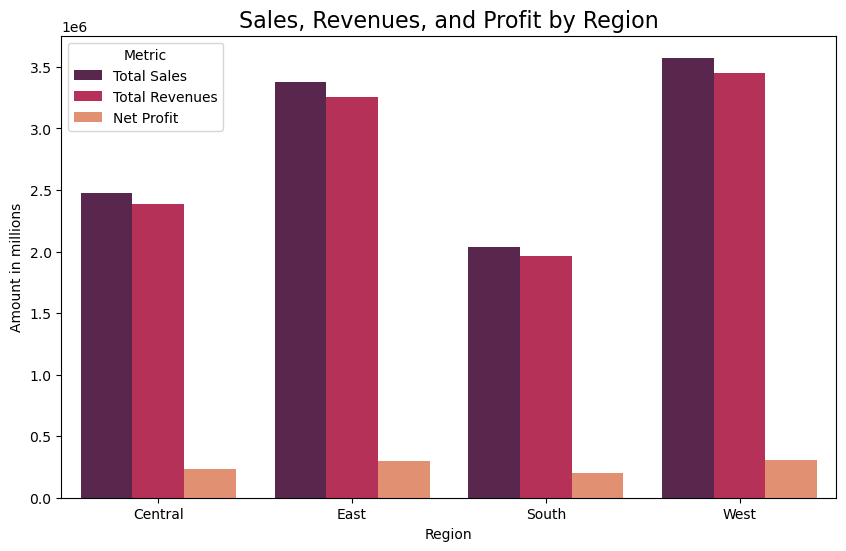

In [ ]:
# Create a clustered bar plot for regions_totals
# Melt the DataFrame to long format for Seaborn plotting
regions_totals_melted = regions_totals.melt(id_vars='Region',
                                value_vars=['Total Sales', 'Total Revenues', 'Net Profit'],
                                var_name='Metric', value_name='Amount')

plt.figure(figsize=(10, 6))

sns.barplot(x='Region', y='Amount', hue='Metric', data=regions_totals_melted, palette='rocket')

plt.xlabel('Region')
plt.ylabel('Amount in millions')
plt.title('Sales, Revenues, and Profit by Region', fontsize=16)

plt.show()

In [ ]:
# What is the most demanded sub-category in each region?
subcat_demand_by_region = Retail_orders.groupby(['Region', 'Sub Category'])['Quantity'].sum()
subcat_demand_by_region = subcat_demand_by_region.reset_index()

# Get the most demanded sub-category in each region
most_demanded_subcat_by_region = subcat_demand_by_region.loc[
    subcat_demand_by_region.groupby('Region')['Quantity'].idxmax()]

print(most_demanded_subcat_by_region)

     Region Sub Category  Quantity
3   Central      Binders      1473
20     East      Binders      1652
37    South      Binders       980
54     West      Binders      1865


In [ ]:
# What are the top 10 states that contribute most to revenues?
top_10_states_revenues = Retail_orders.groupby('State').agg({'Total Revenues': 'sum'})
top_10_states_revenues.sort_values(by=['Total Revenues'], inplace=True, ascending=False)
top_10_states_revenues.head(10)

,Total Revenues
State,
California,2200661.7
New York,1503857.1
Texas,804546.7
Washington,668161.2
Pennsylvania,581119.1
Florida,453911.3
Michigan,394727.5
Virginia,364309.2
Illinois,351414.2


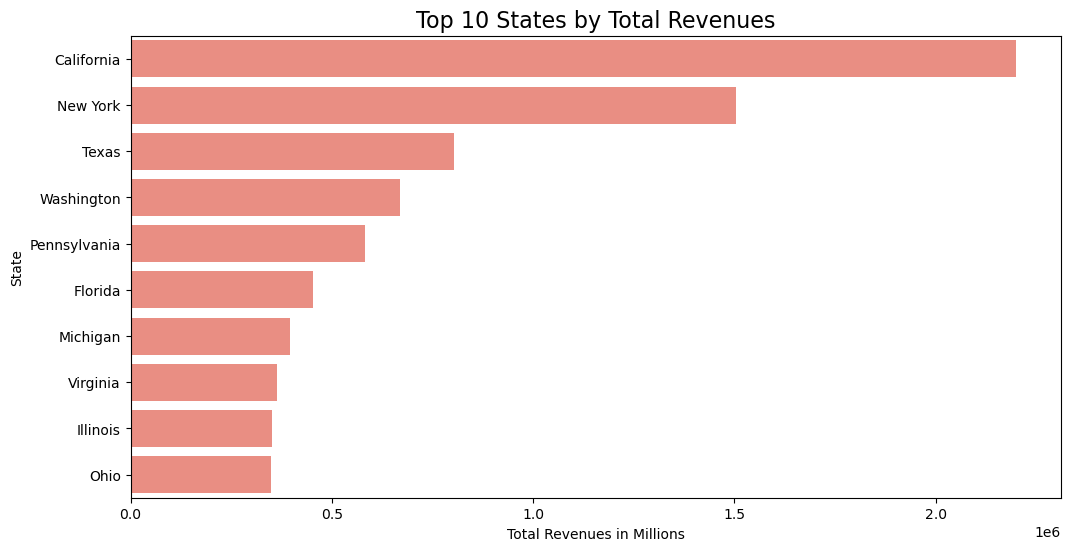

In [ ]:
# Create a barplot for top_10_states_revenues
plt.figure(figsize=(12,6))

sns.barplot(x='Total Revenues', y='State', data=top_10_states_revenues.head(10), color='salmon')

plt.xlabel('Total Revenues in Millions')
plt.ylabel('State')
plt.title('Top 10 States by Total Revenues', fontsize=16)

plt.show()

In [ ]:
# What are the bottom 10 states that least contribute to revenues?
bottom_10_states_revenues = Retail_orders.groupby('State').agg({'Total Revenues': 'sum'})
bottom_10_states_revenues.sort_values(by='Total Revenues', inplace=True, ascending=False)
bottom_10_states_revenues.tail(10)

,Total Revenues
State,
New Mexico,23416.9
Montana,23032.3
District of Columbia,15336.1
Idaho,13576.6
Kansas,8618.0
Maine,7414.2
Wyoming,6144.0
West Virginia,5793.2
South Dakota,3648.8


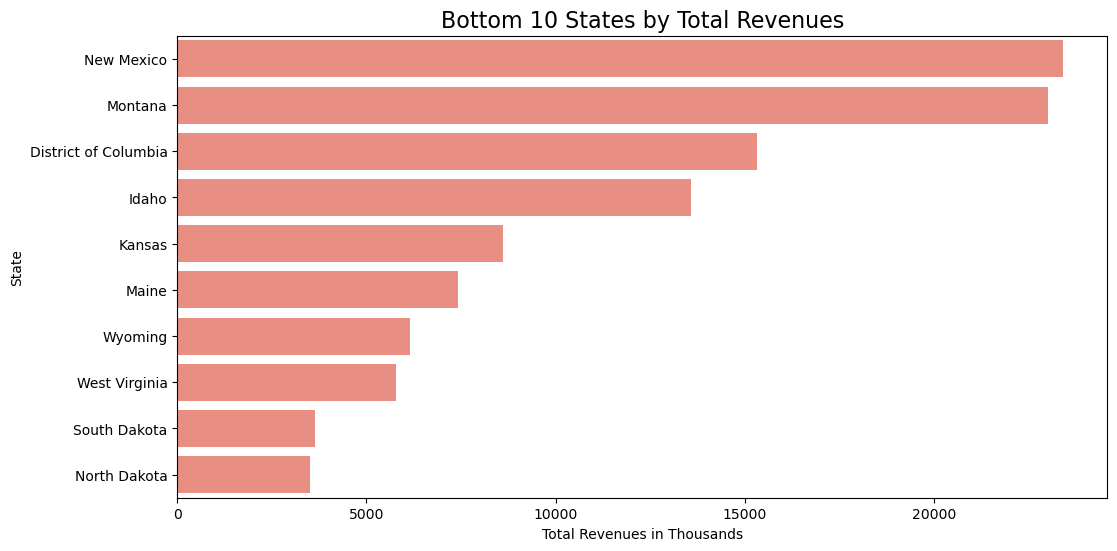

In [ ]:
# Create a barplot for bottom_10_states_revenues
plt.figure(figsize=(12,6))

sns.barplot(x='Total Revenues', y='State', data=bottom_10_states_revenues.tail(10), color='salmon')

plt.xlabel('Total Revenues in Thousands')
plt.ylabel('State')
plt.title('Bottom 10 States by Total Revenues', fontsize=16)

plt.show()

In [ ]:
# What are the top 10 cities that contribute most to revenues?
top_10_cities_revenues = Retail_orders.groupby('City').agg({'Total Revenues': 'sum'})
top_10_cities_revenues.sort_values(by=['Total Revenues'], inplace=True, ascending=False)
top_10_cities_revenues.head(10)

,Total Revenues
City,
New York City,1218342.6
Los Angeles,823877.4
Seattle,577155.7
Philadelphia,548049.3
San Francisco,522682.6
Houston,295192.9
Detroit,259693.1
San Diego,250068.4
Jacksonville,232950.5


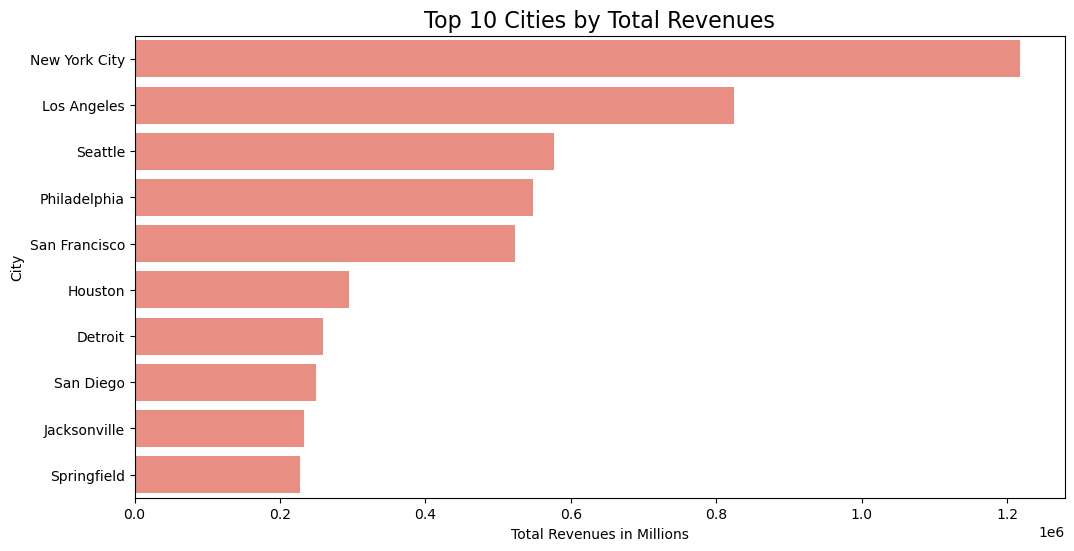

In [ ]:
# Create a barplot for top_10_cities_revenues
plt.figure(figsize=(12,6))

sns.barplot(x='Total Revenues', y='City', data=top_10_cities_revenues.head(10), color='salmon')

plt.xlabel('Total Revenues in Millions')
plt.ylabel('City')
plt.title('Top 10 Cities by Total Revenues', fontsize=16)

plt.show()

In [ ]:
# What are the bottom 10 cities that least contribute to revenues?
bottom_10_cities_revenues = Retail_orders.groupby('City').agg({'Total Revenues': 'sum'})
bottom_10_cities_revenues.sort_values(by='Total Revenues', inplace=True, ascending=False)
bottom_10_cities_revenues.tail(10)

,Total Sales
City,
Port Orange,10
Iowa City,10
Elyria,0
Pensacola,0
Springdale,0
San Luis Obispo,0
Jupiter,0
Ormond Beach,0
Abilene,0


## Analysis of shipping modes

In [ ]:
# What is the distribution of shipping modes?
shipping_modes_dist = Retail_orders['Ship Mode'].value_counts().reset_index(name='Count')
shipping_modes_dist

,Ship Mode,Count
0,Standard Class,5962
1,Second Class,1945
2,First Class,1538
3,Same Day,543


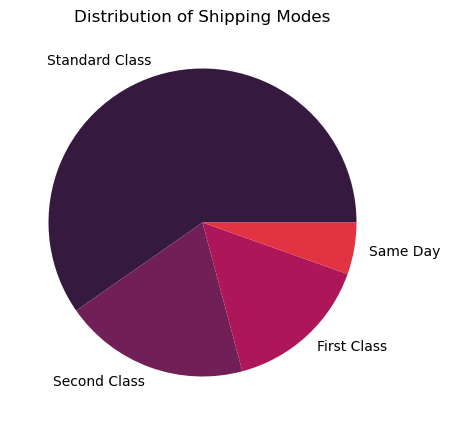

In [ ]:
# Create a pie chart for shipping modes
plt.figure(figsize=(5, 5))

colors = sns.color_palette('rocket')
plt.pie(shipping_modes_dist['Count'], labels=shipping_modes_dist['Ship Mode'], colors=colors)

plt.title('Distribution of Shipping Modes')

plt.show()

In [ ]:
# What is the distribution of categories for different shipping modes?
cat_by_ship_mode = Retail_orders.groupby(['Ship Mode'])['Category'].value_counts().reset_index(name='Count')
cat_by_ship_mode

,Ship Mode,Category,Count
0,First Class,Office Supplies,910
1,First Class,Furniture,327
2,First Class,Technology,301
3,Same Day,Office Supplies,326
4,Same Day,Furniture,119
5,Same Day,Technology,98
6,Second Class,Office Supplies,1152
7,Second Class,Furniture,427
8,Second Class,Technology,366
9,Standard Class,Office Supplies,3635


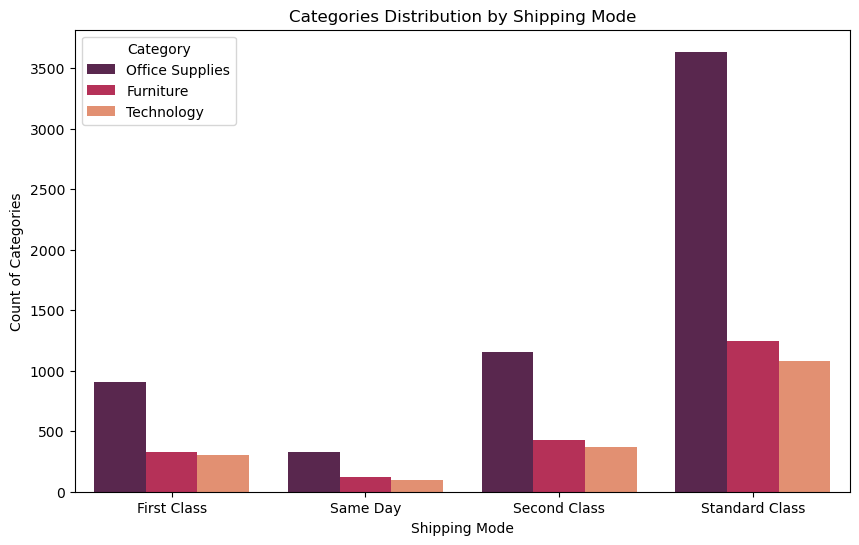

In [ ]:
# Create a clustered bar plot for cat_by_ship_mode
plt.figure(figsize=(10, 6))

sns.barplot(x='Ship Mode', y='Count', hue='Category', data=cat_by_ship_mode, palette='rocket')

plt.xlabel('Shipping Mode')
plt.ylabel('Count of Categories')
plt.title('Categories Distribution by Shipping Mode')

plt.show()

In [ ]:
# What shipping mode achieved the highest sales?
sales_by_ship_mode = Retail_orders.groupby('Ship Mode').agg({'Total Sales': 'sum'})
sales_by_ship_mode.sort_values(by= ['Total Sales'], inplace=True, ascending=False)
sales_by_ship_mode

,Total Sales
Ship Mode,
Standard Class,6876390
Second Class,2376960
First Class,1624230
Same Day,587640


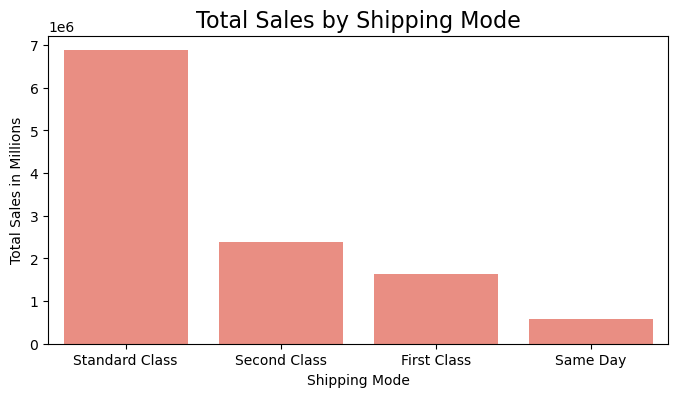

In [ ]:
# Create a bar plot for sales_by_ship_mode
plt.figure(figsize=(8, 4))

sns.barplot(x='Ship Mode', y='Total Sales', data=sales_by_ship_mode, color='salmon')

plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales in Millions')
plt.title('Total Sales by Shipping Mode', fontsize=16)

plt.show()

## Save the clean dataset

In [ ]:
# Save the DataFrame as 'Retail_orders_edited.csv'
Retail_orders.to_csv('Retail_orders_edited.csv', index=False)

# Confirmation message
print("The dataset has been saved as 'Retail_orders_edited.csv'.")


The dataset has been saved as 'Retail_orders_edited.csv'.
